In [1]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
dias = ["02-03-2018.csv", "21-02-2018.csv", "15-02-2018.csv", "16-02-2018.csv", "28-02-2018.csv", "14-02-2018.csv", "22-02-2018.csv", "23-02-2018.csv"]

In [3]:
dfTotal = pd.DataFrame()
for dia in dias:
    dfAux = pd.read_csv("../../../Dataset/" + dia, low_memory = False)
    dfAux = dfAux.drop([0,1])
    dfTotal = pd.concat([dfTotal, dfAux])
    print("Ficheiro " + dia + " carregado")

Ficheiro 02-03-2018.csv carregado
Ficheiro 21-02-2018.csv carregado
Ficheiro 15-02-2018.csv carregado
Ficheiro 16-02-2018.csv carregado
Ficheiro 28-02-2018.csv carregado
Ficheiro 14-02-2018.csv carregado
Ficheiro 22-02-2018.csv carregado
Ficheiro 23-02-2018.csv carregado


In [4]:
dfTotal

,Dst Port,Fwd PSH Flags,Protocol,Bwd PSH Flags,Flow Duration,Fwd URG Flags,Tot Fwd Pkts,Bwd URG Flags,Tot Bwd Pkts,FIN Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,443.0,0,6.0,0,141385.0,0,9.0,0,7.0,0,...,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49684.0,1,6.0,0,281.0,0,2.0,0,1.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,443.0,0,6.0,0,279824.0,0,11.0,0,15.0,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,443.0,0,6.0,0,132.0,0,2.0,0,0.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,443.0,0,6.0,0,274016.0,0,9.0,0,13.0,0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042864,54116.0,0,6.0,0,85992425.0,0,2.0,0,0.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,85992425.0,0.0,85992425.0,85992425.0
1042865,33914.0,0,6.0,0,132.0,0,2.0,0,0.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042866,53.0,0,17.0,0,79134.0,0,1.0,0,1.0,0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042867,3389.0,0,6.0,0,10053785.0,0,11.0,0,12.0,0,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dfAux = pd.read_csv("../../../Dataset/01-03-2018.csv", low_memory = False)

In [6]:
dfAux = dfAux.drop([0,1])

In [7]:
dfTeste = pd.DataFrame()
for colu in dfTotal.columns.tolist():
    dfTeste[colu] = dfAux[colu]

In [8]:
dfAux = None

In [9]:
dfTeste

,Dst Port,Fwd PSH Flags,Protocol,Bwd PSH Flags,Flow Duration,Fwd URG Flags,Tot Fwd Pkts,Bwd URG Flags,Tot Bwd Pkts,FIN Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,0,0,0,0,115307855,0,5,0,0,0,...,0,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000
3,0,0,0,0,60997457,0,2,0,0,0,...,0,0,0,0,0,0,61000000,0,61000000,61000000
4,67,0,17,0,61149019,0,5,0,0,0,...,4,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725
5,0,0,0,0,60997555,0,2,0,0,0,...,0,0,0,0,0,0,61000000,0,61000000,61000000
6,0,0,0,0,61997503,0,3,0,0,0,...,0,0,999909,0,999909,999909,61000000,0,61000000,61000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328178,0,0,0,0,118494070,0,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328179,2634,0,6,0,114340,0,2,0,1,0,...,0,20,0,0,0,0,0,0,0,0
328180,3389,0,6,0,1404866,0,8,0,7,0,...,5,20,0,0,0,0,0,0,0,0
328181,3389,0,6,0,3966663,0,14,0,7,0,...,7,20,0,0,0,0,0,0,0,0


In [10]:
input_label_Total = []
output_label_Total= []
input_label_Teste = []
output_label_Teste = []

In [11]:
input_label_Total = np.array(dfTotal.loc[:, dfTotal.columns != "Label"]).astype(np.float)
output_label_Total = np.array(dfTotal["Label"])
out = []
for o in output_label_Total:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label_Total = out

In [12]:
dfTotal = None
gc.collect()

111

In [13]:
input_label_Teste = np.array(dfTeste.loc[:, dfTeste.columns != "Label"]).astype(np.float)
output_label_Teste = np.array(dfTeste["Label"])
out = []
for o in output_label_Teste:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label_Teste = out

In [14]:
dfTeste = None
out = None
gc.collect()

30

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(np.concatenate((input_label_Total, input_label_Teste)))
input_label_Total = scaler.transform(input_label_Total)
input_label_Teste = scaler.transform(input_label_Teste)

In [16]:
input_label_Total, output_label_Total = shuffle(input_label_Total, output_label_Total)
input_label_Teste, output_label_Teste = shuffle(input_label_Teste, output_label_Teste)

In [17]:
encoder = keras.models.load_model('../Encoder.h5')

In [18]:
input_label_Total = encoder.predict(np.array(input_label_Total)).reshape(len(input_label_Total), 18, 1)
input_label_Teste = encoder.predict(np.array(input_label_Teste)).reshape(len(input_label_Teste), 18, 1)

In [19]:
model = keras.Sequential([
    keras.layers.Conv1D(filters = 16, input_shape = (18,1), kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
    keras.layers.MaxPool1D(pool_size = 3),
    keras.layers.Conv1D(filters = 8, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
    keras.layers.MaxPool1D(pool_size = 3),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 2, activation = "softmax")
])
model.compile(optimizer= keras.optimizers.Adam(learning_rate = 0.00025), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [20]:
model.fit(x = np.array(input_label_Total), y = np.array(output_label_Total), validation_split= 0.1, epochs = 10, shuffle = True,verbose = 1)

Epoch 1/10
222742/222742 [==============================] - 358s 2ms/step - loss: 0.2199 - accuracy: 0.9006 - val_loss: 0.1543 - val_accuracy: 0.9278
Epoch 2/10
222742/222742 [==============================] - 339s 2ms/step - loss: 0.1536 - accuracy: 0.9277 - val_loss: 0.1500 - val_accuracy: 0.9307
Epoch 3/10
222742/222742 [==============================] - 341s 2ms/step - loss: 0.1494 - accuracy: 0.9296 - val_loss: 0.1481 - val_accuracy: 0.9307
Epoch 4/10
222742/222742 [==============================] - 329s 1ms/step - loss: 0.1484 - accuracy: 0.9295 - val_loss: 0.1475 - val_accuracy: 0.9307
Epoch 5/10
222742/222742 [==============================] - 319s 1ms/step - loss: 0.1473 - accuracy: 0.9297 - val_loss: 0.1480 - val_accuracy: 0.9312
Epoch 6/10
222742/222742 [==============================] - 315s 1ms/step - loss: 0.1471 - accuracy: 0.9298 - val_loss: 0.1465 - val_accuracy: 0.9316
Epoch 7/10
222742/222742 [==============================] - 319s 1ms/step - loss: 0.1467 - accuracy:

In [21]:
res = [np.argmax(resu) for resu in model.predict(input_label_Teste)]

In [22]:
cm = confusion_matrix(y_true = np.array(output_label_Teste).reshape(len(output_label_Teste)), y_pred = np.array(res))

In [23]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[233851   1927]
 [ 91787    616]]


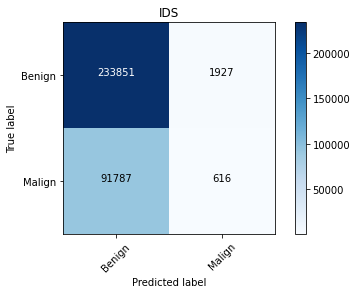

In [24]:
labels = ["Benign", "Malign"]
plot_confusion_matrix(cm = cm, classes = labels, title = "IDS")

In [25]:
output_label_Teste = np.array(output_label_Teste).reshape(len(output_label_Teste))
res = np.array(res)
fpr, tpr, _ = roc_curve(output_label_Teste,  res)
auc = roc_auc_score(output_label_Teste, res)

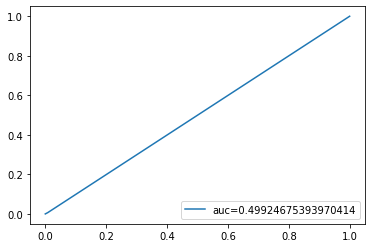

In [26]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()